In [55]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/code/Human-slice-scripts/style_plot_intrinsic.mplstyle')

data = pd.read_excel('/Users/verjim/laptop_D_17.01.2022/Schmitz_lab/data/human/solutions_QC.xlsx') # Uncomment and modify if needed

/var/folders/5y/f01m99kn5tx3chk04wp6sc440000gn/T/ipykernel_22487/2120300967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time_binary'] = filtered_data['time'].apply(lambda x: 0 if x == 0 else 1)


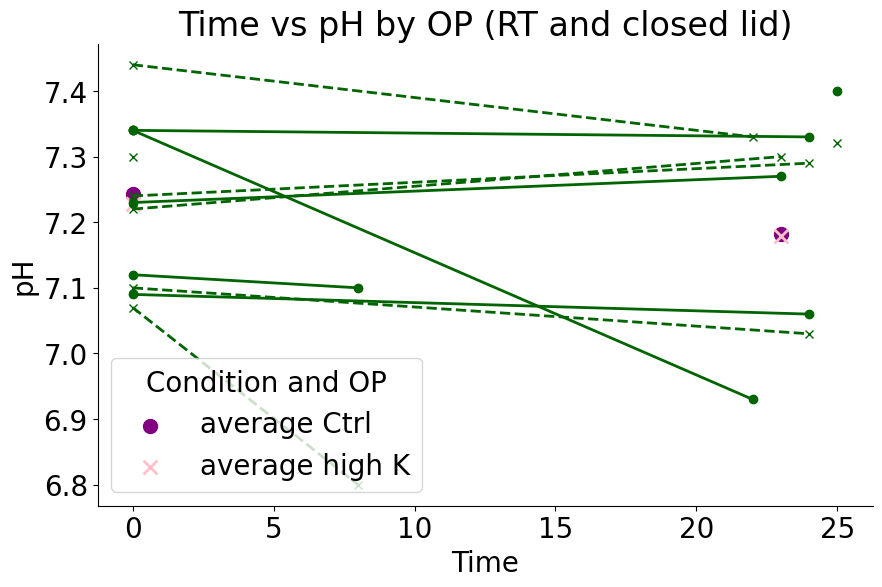

In [70]:
param = 'pH'  # 'pH' or 'osmol'

filtered_data = data[(data['temp'] == 'RT') & (data['lid'] == 'closed')]
filtered_data['time_binary'] = filtered_data['time'].apply(lambda x: 0 if x == 0 else 1)

# Separating the data into 'Ctrl' and 'high K'
ctrl_data = filtered_data[filtered_data['solution'] == 'Ctrl']
high_k_data = filtered_data[filtered_data['solution'] == 'high K (+ 8mM)']

# Grouping the filtered data by 'OP' column
ctrl_groups = ctrl_data.groupby('OP')
high_k_groups = high_k_data.groupby('OP')

# Plotting
plt.figure(figsize=(10, 6))

# Plotting 'Ctrl' data
for name, group in ctrl_groups:
    plt.plot(group.time, group[param], marker='o', linestyle='-')

# Plotting 'high K' data
for name, group in high_k_groups:
    plt.plot(group.time, group[param], marker='x', linestyle='--')

# Calculating the average pH for each time point within each group
ctrl_avg = ctrl_data.groupby('time_binary')[param].mean().reset_index()
high_k_avg = high_k_data.groupby('time_binary')[param].mean().reset_index()

# # Plotting average data
plt.scatter([0,23], ctrl_avg[param], marker='o', s = 100, c = 'purple', label = 'average Ctrl')
plt.scatter([0,23], high_k_avg[param], marker='x', s = 100, c = 'pink', label = 'average high K')

plt.xlabel('Time')
plt.ylabel(param)
plt.title('Time vs pH by OP (RT and closed lid)')
plt.legend(title='Condition and OP')
#plt.grid(True)
plt.show()